In [1]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)

import h5py
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.keras import backend 


TensorFlow version: 2.6.0


In [2]:
f = h5py.File('../top_dataset.h5', 'r')
for key in f.keys():
    print(key)
targets = f['targets']
iters=f['iters']

#data = group['targets'][()]

iters
targets


In [16]:
type(iters)

h5py._hl.dataset.Dataset

In [3]:
X_np=np.float32(iters)
y_np=np.float32(targets)




In [15]:
y_np.shape

(10000, 40, 40, 1)

In [4]:
#y_np[imN,:,:,0].shape

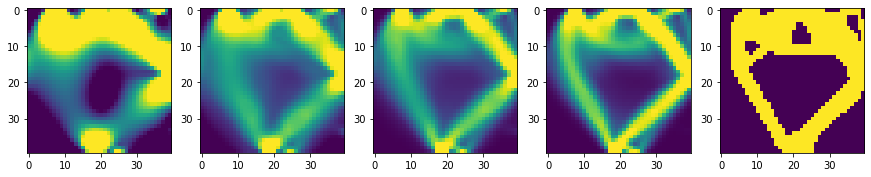

In [5]:
imN=37

f, axarr = plt.subplots(1,5)
f.set_figheight(15)
f.set_figwidth(15)

axarr[0].imshow(X_np[imN,:,:,0])
axarr[1].imshow(X_np[imN,:,:,1])
axarr[2].imshow(X_np[imN,:,:,2])
axarr[3].imshow(X_np[imN,:,:,3])
axarr[4].imshow(y_np[imN,:,:,0])

In [6]:
send_iter=5
X_np_5=X_np[:,:,:,send_iter-1:send_iter+1]
X_np_5[:,:,:,1]=X_np[:,:,:,send_iter-1]-X_np[:,:,:,send_iter-2]

In [14]:
type(X_np_5)

numpy.ndarray

In [13]:
for i in X_np:
    print(i[:,:,8].shape)
    break

(40, 40)


In [7]:
send_iter=10
X_np_10=X_np[:,:,:,send_iter-1:send_iter+1]
X_np_10[:,:,:,1]=X_np[:,:,:,send_iter-1]-X_np[:,:,:,send_iter-2]

In [8]:
from u_net import Unet_Model
model = Unet_Model(u_layers=4,min_feature=32)


2022-03-10 04:19:11.398783: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-10 04:19:11.402602: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.train(X_np_5, y_np,EPOCHS=30)

2022-03-03 08:10:32.196356: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


Epoch 1, Loss: 0.03, MSE: 5.43, Accuracy IoU: 85.91, Test Loss: 0.03, Test MSE: 5.84Test IoU Accuracy: 88.96
Epoch 2, Loss: 0.02, MSE: 4.09, Accuracy IoU: 89.18, Test Loss: 0.02, Test MSE: 5.53Test IoU Accuracy: 89.52
Epoch 3, Loss: 0.02, MSE: 3.94, Accuracy IoU: 89.59, Test Loss: 0.02, Test MSE: 5.44Test IoU Accuracy: 89.69
Epoch 4, Loss: 0.02, MSE: 3.85, Accuracy IoU: 89.82, Test Loss: 0.02, Test MSE: 5.13Test IoU Accuracy: 90.25
Epoch 5, Loss: 0.02, MSE: 3.75, Accuracy IoU: 90.06, Test Loss: 0.02, Test MSE: 5.08Test IoU Accuracy: 90.33
Epoch 6, Loss: 0.02, MSE: 3.68, Accuracy IoU: 90.24, Test Loss: 0.02, Test MSE: 4.97Test IoU Accuracy: 90.52
Epoch 7, Loss: 0.02, MSE: 3.60, Accuracy IoU: 90.46, Test Loss: 0.02, Test MSE: 5.00Test IoU Accuracy: 90.48
Epoch 8, Loss: 0.02, MSE: 3.54, Accuracy IoU: 90.61, Test Loss: 0.02, Test MSE: 4.69Test IoU Accuracy: 91.04
Epoch 9, Loss: 0.02, MSE: 3.47, Accuracy IoU: 90.81, Test Loss: 0.02, Test MSE: 4.51Test IoU Accuracy: 91.37
Epoch 10, Loss: 0.0

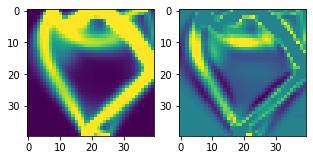

In [10]:

f, axarr = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(5)

axarr[0].imshow(X_np_5[imN,:,:,0])
axarr[1].imshow(X_np_5[imN,:,:,1])


In [11]:
n=5
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_np_5, y_np)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_np_5, y_np)).batch(32)

MSE: 0.98, 
IOU: 0.95, 
(32, 40, 40, 1)


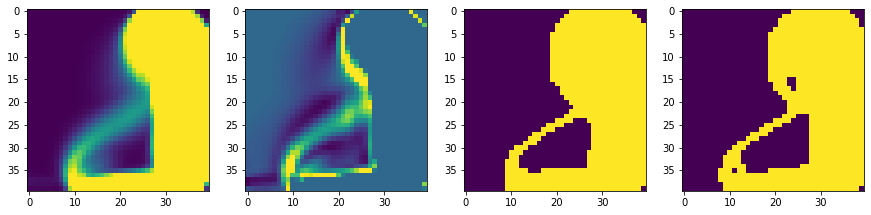

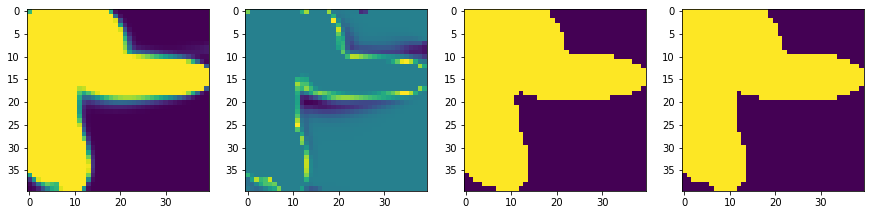

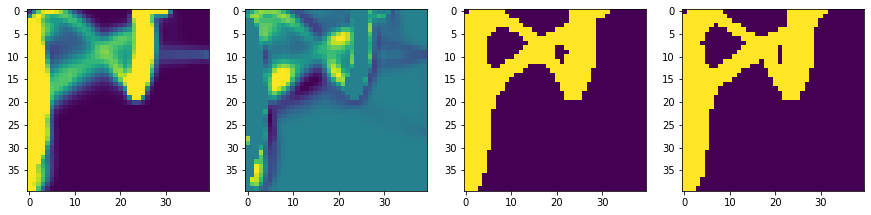

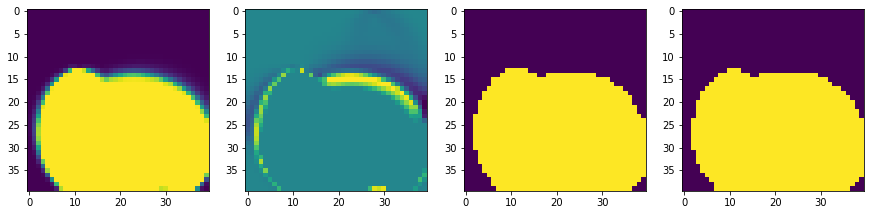

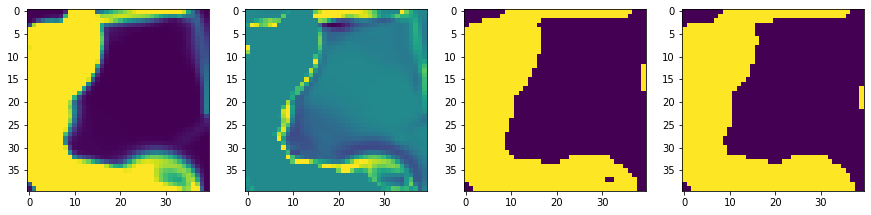

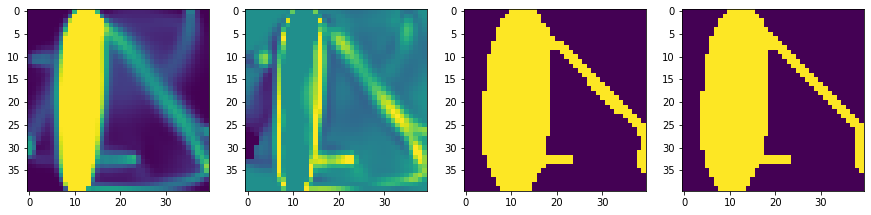

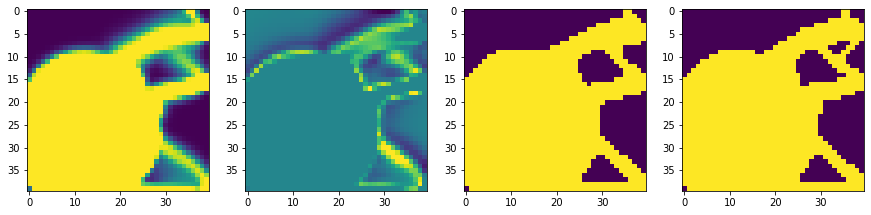

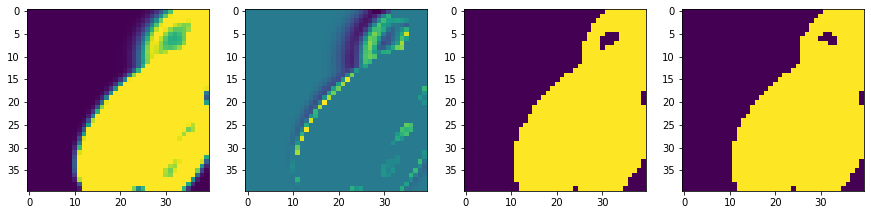

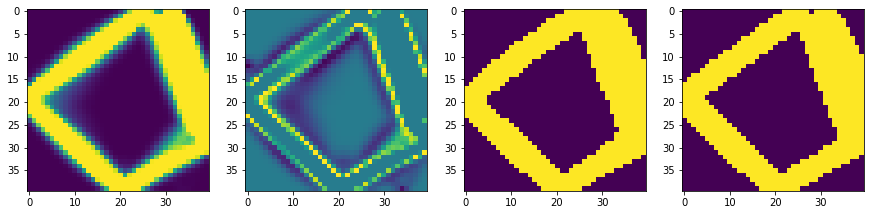

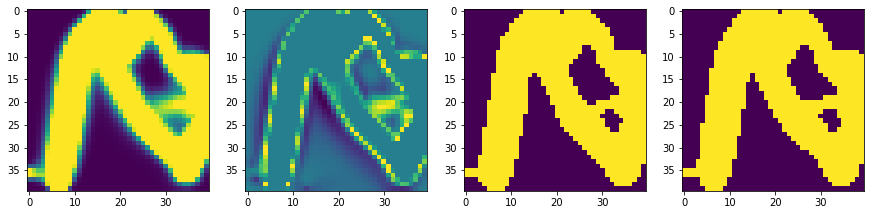

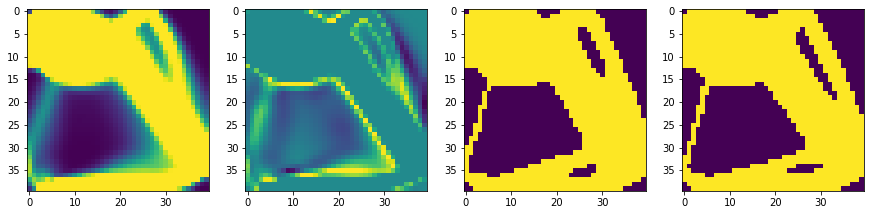

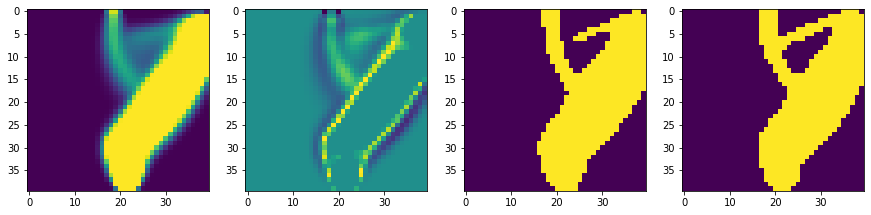

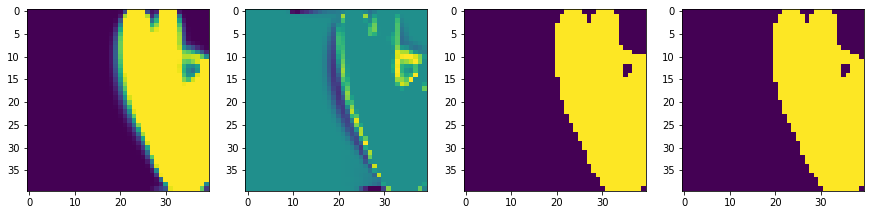

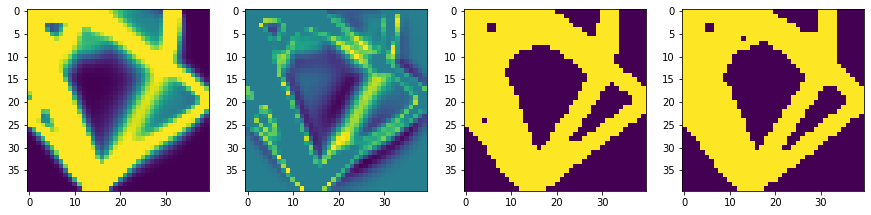

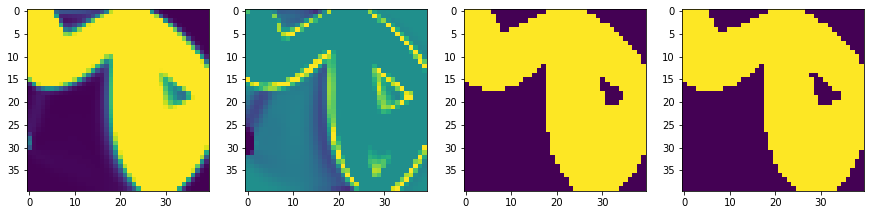

In [24]:
test_accuracy = tf.keras.metrics.MeanSquaredError(name='test_accuracy')
test_IoU_accuracy = tf.keras.metrics.MeanIoU(num_classes=2,name='IoU')
for im, lab in test_ds:
    tst=model(im,training=False)
    tst=tst.numpy()
    tst=np.round(tst)

    print(f'MSE: {1-test_accuracy(lab, tst):.2f}, ')
    print(f'IOU: {test_IoU_accuracy(lab, tst) :.2f}, ')

    print(tst.shape)
    for i in range(15):
        f, axarr = plt.subplots(1,4)
        f.set_figheight(15)
        f.set_figwidth(15)

        axarr[0].imshow(images[i,:,:,0])
        axarr[1].imshow(images[i,:,:,1])
        axarr[2].imshow(tst[i,:,:,0])
        axarr[3].imshow(labels[i])
    break